In [67]:
import matplotlib.pyplot as plt
import turtle
import pandas as pd
%matplotlib inline
plt.style.use('default')
covid_df = pd.read_csv('data/covid_df.csv')


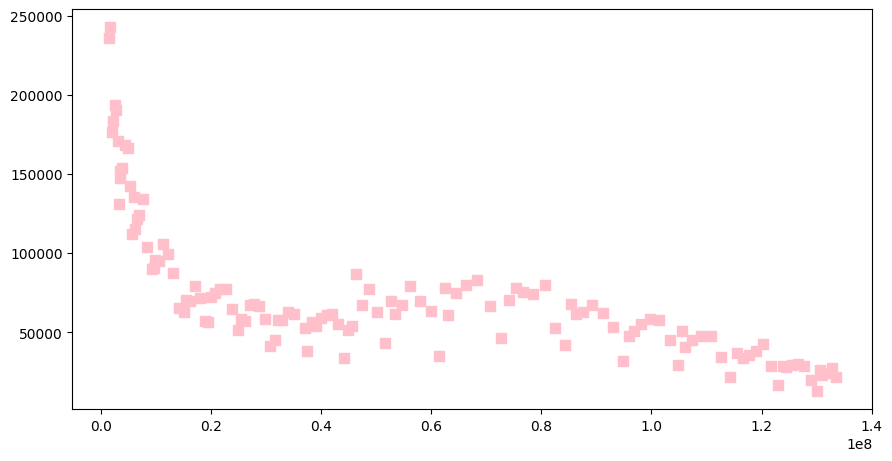

In [68]:
us_data = covid_df[covid_df['country'] == 'United States']

fig = plt.figure(figsize=(8, 4))
axes = fig.add_axes([0, 0, 1, 1])
axes.scatter(
    x= us_data['people_fully_vaccinated'],
    y= us_data['daily_confirmed'],
    s=50,
    marker= 's',
    c= 'pink',
);


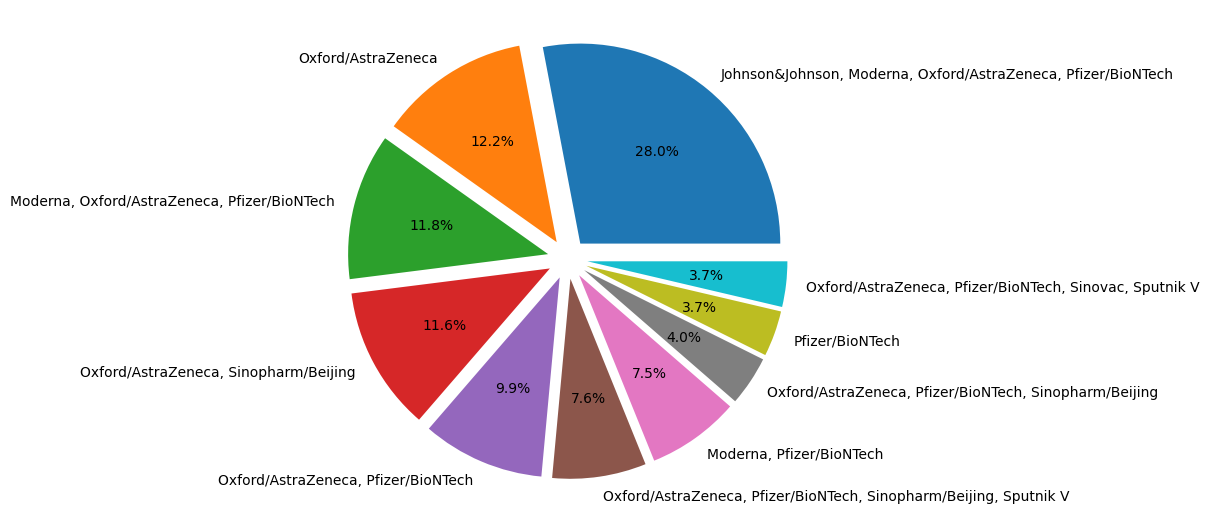

In [69]:
vaccine_combinations = covid_df['vaccines'].value_counts()[:10]
fig = plt.figure(figsize=(5, 5))
axes = fig.add_axes([0,0,1,1])
axes.pie(
    vaccine_combinations,
    labels= vaccine_combinations.index,
    autopct= '%.1f%%',
    explode= [0.1 for i in vaccine_combinations]
);

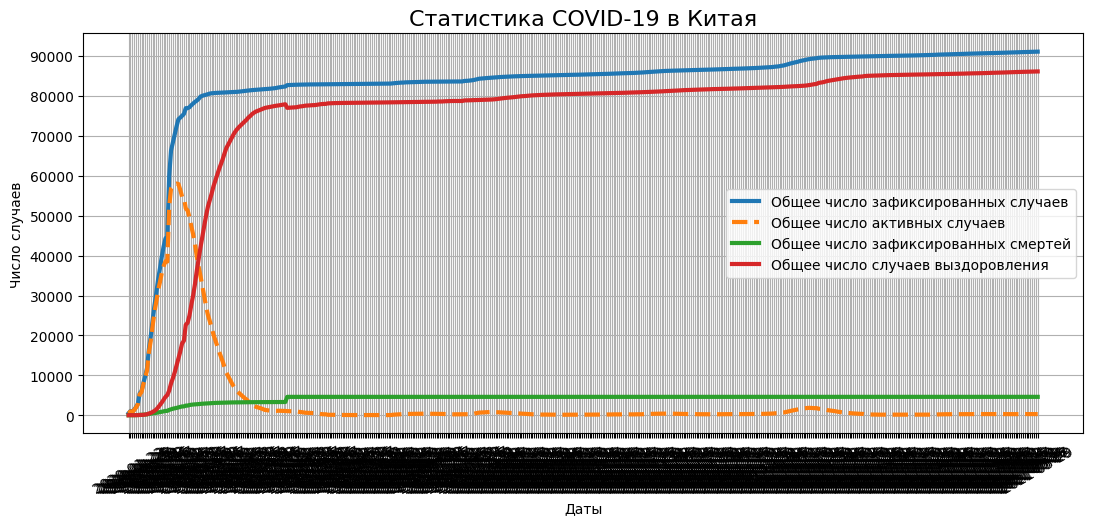

In [70]:
from cProfile import label


china_data = covid_df[covid_df['country'] == 'China'].sort_values(by='date')
china_grouped = china_data.groupby(['date'])[['confirmed', 'active', 'deaths', 'recovered']].sum()

fig = plt.figure(figsize= (10, 4))
axes = fig.add_axes([0, 0, 1, 1])
axes.plot(china_grouped['confirmed'], label= 'Общее число зафиксированных случаев', lw=3)
axes.plot(china_grouped['active'], label= 'Общее число активных случаев', lw=3, linestyle= 'dashed')
axes.plot(china_grouped['deaths'], label= 'Общее число зафиксированных смертей', lw=3)
axes.plot(china_grouped['recovered'], label= 'Общее число случаев выздоровления', lw=3)

axes.set_title('Статистика COVID-19 в Китая', fontsize= 16)
axes.set_xlabel('Даты')
axes.set_ylabel('Число случаев')
axes.set_yticks(range(0, 100000, 10000))
axes.xaxis.set_tick_params(rotation=30)
axes.grid()
axes.legend();


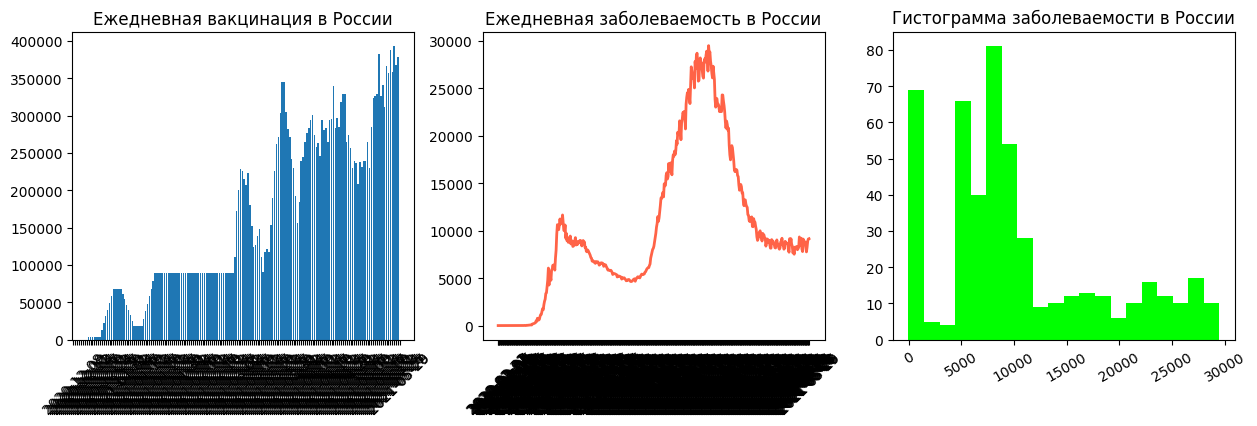

In [72]:
russia_data = covid_df[covid_df['country'] == 'Russia']

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 4))
axes[0].bar(
    x= russia_data['date'],
    height= russia_data['daily_vaccinations'],
    label= 'Число вакцинированных'
)
axes[0].set_title('Ежедневная вакцинация в России')
axes[0].xaxis.set_tick_params(rotation=45)

axes[1].plot(
    russia_data["date"],
    russia_data["daily_confirmed"],
    label="Число заболевших",
    color="tomato",
    lw=2,
)

axes[1].set_title("Ежедневная заболеваемость в России")
axes[1].xaxis.set_tick_params(rotation=45)

axes[2].hist(
    x=russia_data["daily_confirmed"], label=["Число заболевших"], color="lime", bins=20
)
axes[2].set_title("Гистограмма заболеваемости в России")
axes[2].xaxis.set_tick_params(rotation=30)

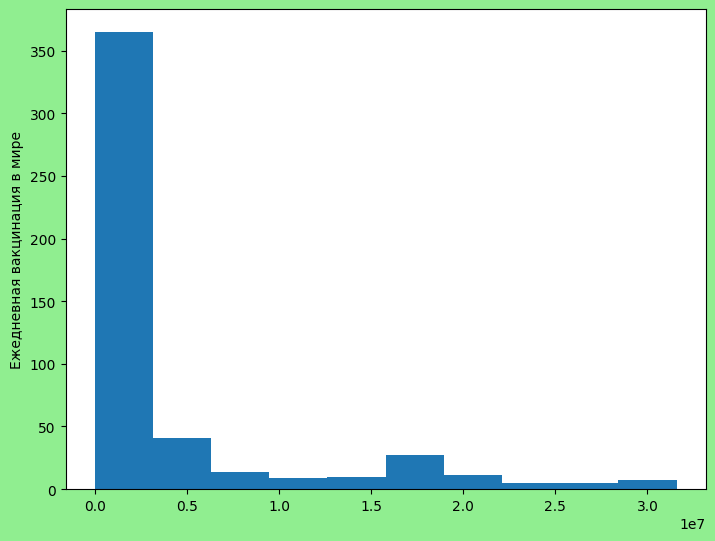

In [73]:
fig = plt.figure(facecolor='lightgreen')
axes = fig.add_axes([0, 0, 1, 1])
axes.hist(covid_df.groupby('date')['daily_vaccinations'].sum())
axes.set_ylabel('Ежедневная вакцинация в мире');

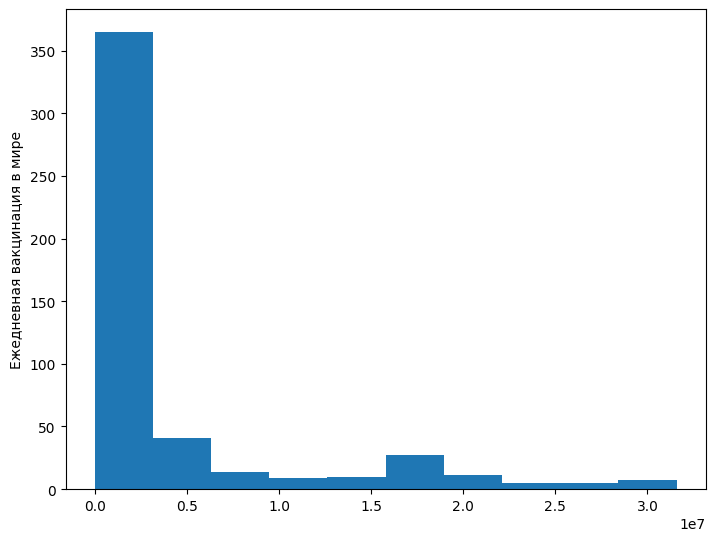

In [74]:
fig = plt.figure(edgecolor='lightgreen')
axes = fig.add_axes([0, 0, 1, 1])
axes.hist(covid_df.groupby('date')['daily_vaccinations'].sum())
axes.set_ylabel('Ежедневная вакцинация в мире');